# Example of various pivpy methods

In [47]:
from pivpy import io, pivpy, graphics
import numpy as np
import xarray as xr
import os
import pkg_resources as pkg

import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
f1 = 'Run000001.T000.D000.P000.H001.L.vec'
f2 = 'Run000002.T000.D000.P000.H001.L.vec'
path = pkg.resource_filename('pivpy','data')

a = io.load_vec(os.path.join(path,f1))
b = io.load_vec(os.path.join(path,f2))

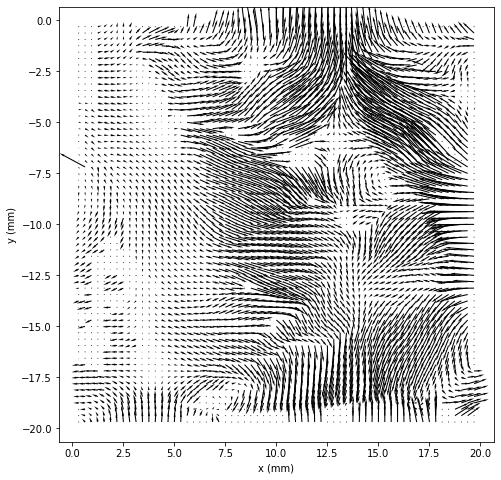

In [56]:
# select where t = 1 (explicit time)
fig, ax = graphics.quiver(a.sel(t=1),arrScale=10)

#increase figure size
fig.set_size_inches(11,8)

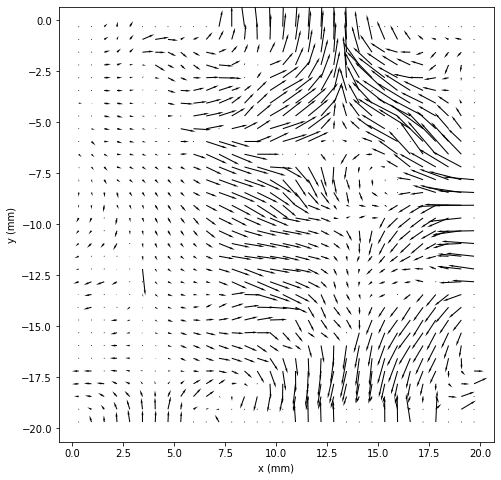

In [59]:
# select just the first frame whatever t is .
b['t'] += 10
# define size before the plot
plt.figure(figsize=(11,8))

# show less vectors using nthArr 
fig, ax = graphics.quiver(b.isel(t=0),arrScale=10,nthArr=2)

In [63]:
c = a.piv.crop([5, 15,-5,-15])
a.u.shape, c.u.shape

((63, 63, 1), (32, 32, 1))

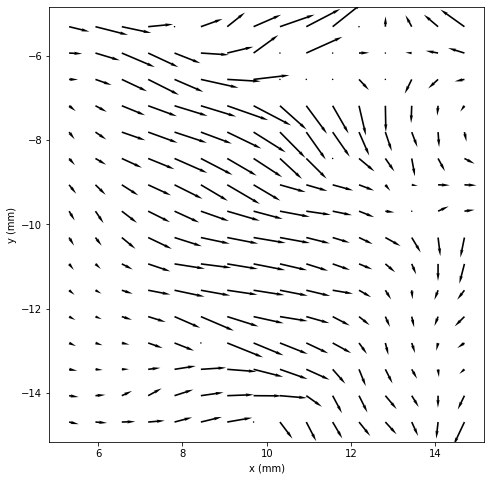

In [62]:
# define size before the plot
plt.figure(figsize=(11,8))

# show less vectors using nthArr 
fig, ax = graphics.quiver(c.isel(t=0),arrScale=10,nthArr=2)

In [64]:
# want to play with some synthetic data? 
c = io.create_sample_dataset()
print(c)

<xarray.Dataset>
Dimensions:  (t: 5, x: 8, y: 5)
Coordinates:
  * y        (y) float64 16.0 44.0 72.0 100.0 128.0
  * x        (x) float64 32.0 45.71 59.43 73.14 86.86 100.6 114.3 128.0
  * t        (t) int64 0 1 2 3 4
Data variables:
    u        (x, y, t) float64 1.0 1.0 1.0 1.0 1.0 2.75 ... 8.0 8.0 8.0 8.0 8.0
    v        (x, y, t) float64 0.1421 0.48 -0.02073 ... 0.3438 -0.4585 -0.1582
    chc      (x, y, t) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes:
    variables:  ['x', 'y', 'u', 'v']
    units:      ['pix', 'pix', 'pix/dt', 'pix/dt']
    dt:         1.0
    files:      


In [66]:
# want to slice it and not crop? 
d = c.sel(x = slice(35,70),y=slice(30,90))
print(d)

<xarray.Dataset>
Dimensions:  (t: 5, x: 2, y: 2)
Coordinates:
  * y        (y) float64 44.0 72.0
  * x        (x) float64 45.71 59.43
  * t        (t) int64 0 1 2 3 4
Data variables:
    u        (x, y, t) float64 2.75 2.75 2.75 2.75 2.75 ... 4.5 4.5 4.5 4.5 4.5
    v        (x, y, t) float64 0.2289 -0.2817 -0.1473 ... -0.2587 -0.3911 0.3434
    chc      (x, y, t) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes:
    variables:  ['x', 'y', 'u', 'v']
    units:      ['pix', 'pix', 'pix/dt', 'pix/dt']
    dt:         1.0
    files:      


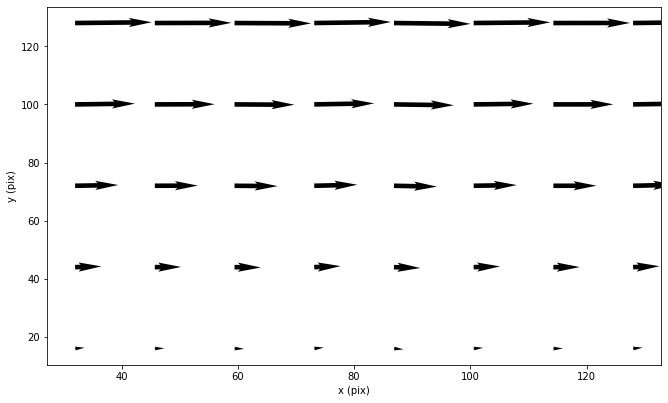

In [72]:
# want to show an ensemble average of 10 frames?
data = io.create_sample_dataset(10)

# want to change the size of arrows and figure aspectratio?
fig,_=graphics.quiver(data.piv.average,arrScale=8,aspectratio=0.5)
fig.set_size_inches(11,8)